In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tf_util.systems import system_from_str
from train_dsn import train_dsn

w_0 1.5811388300841898
zeta 0.7905694150420948


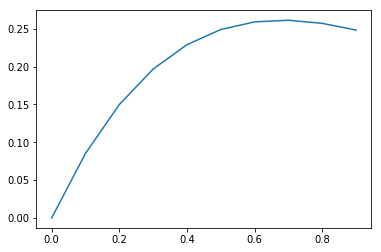

In [4]:
T = 10;
dt = .1;

k = 5.0;
c = 5.0;
m  = 2.0;

bounds = [0.0, 20.0];

w_0 = np.sqrt(k/m);
zeta = c/(2*np.sqrt(m*k));

print('w_0', w_0);
print('zeta', zeta);

A = 1.0;
theta = 0.0;
t = np.linspace(0,dt*(T-1),T);
x = A*np.exp(-(zeta*w_0*t))*np.sin(np.sqrt(1-np.square(zeta))*w_0*t + theta);

dxdt = A*(-zeta*w_0*np.exp(-zeta*w_0*t)*np.sin(np.sqrt(1.0-np.square(zeta))*w_0*t + theta) + \
          np.exp(-zeta*w_0*t)*np.cos(np.sqrt(1-np.square(zeta))*w_0*t + theta)*(np.sqrt(1-np.square(zeta))*w_0));

plt.figure();
plt.plot(t,x);
#plt.plot(t,dxdt);
#plt.legend(['x', 'dxdt']);
plt.show();

init_conds = np.array([0.0, dxdt[0]]);

[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


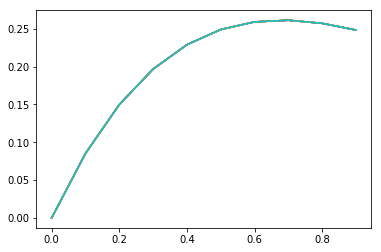

w_0 1.5811388300841898
zeta 0.7905694150420948


In [5]:
# show that the degenerate solution space is just a scaling of c, m, and k
num_s = 10;
s = np.linspace(0,2,num_s);
print(s)

ks = [];
cs = [];
ms = [];
plt.figure();
for i in range(num_s):
    s_i = s[i];
    k_i = s_i*k;
    c_i = s_i*c;
    m_i = s_i*m;
    
    w_0 = np.sqrt(k_i/m_i);
    zeta = c_i/(2*np.sqrt(m_i*k_i));

    x_i = A*np.exp(-(zeta*w_0*t))*np.sin(np.sqrt(1-np.square(zeta))*w_0*t + theta);
    
    plt.plot(t, x_i);
    
    ks.append(k_i);
    cs.append(c_i);
    ms.append(m_i);
    
    dxdt = A*(-zeta*w_0*np.exp(-zeta*w_0*t)*np.sin(np.sqrt(1.0-np.square(zeta))*w_0*t + theta) + \
          np.exp(-zeta*w_0*t)*np.cos(np.sqrt(1-np.square(zeta))*w_0*t + theta)*(np.sqrt(1-np.square(zeta))*w_0));

    init_conds = np.array([0.0, dxdt[0]]);
    
plt.show();

print('w_0', w_0);
print('zeta', zeta);


In [6]:
D = 2;
system_str = 'damped_harmonic_oscillator'

behavior_str = 'steady_state';

system_class = system_from_str(system_str);
system = system_class(behavior_str, T, dt, init_conds, bounds);
print(system.name)

damped_harmonic_oscillator


In [7]:
K = 1;
M = num_s;
num_params = 3;
phi = tf.placeholder(dtype=tf.float64, shape=(K, M, num_params, 1));

X = system.simulate(phi);

_phi = np.expand_dims(np.expand_dims(np.array([ks,cs,ms]).T, 0), 3);
print(_phi.shape);

phi (1, 10, 3, 1)
(1, 10, 3, 1)


(1, 10, 2, 10)


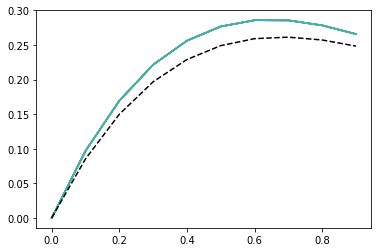

In [8]:
with tf.Session() as sess:
    _X = sess.run(X, {phi:_phi});

print(_X.shape);
t = np.linspace(0.0, dt*(T-1), T);

plt.figure();
for i in range(num_s):
    plt.plot(t, _X[0,i,0,:]);
plt.plot(t, x_i, 'k--');
plt.show();

In [9]:
# behavioral constraints
mu = x
Sigma = .0001*np.ones((T,));

{'mu': array([0.        , 0.08531395, 0.1498733 , 0.19684388, 0.22907949,
       0.24912793, 0.25924244, 0.26139712, 0.25730513, 0.24843856]), 'Sigma': array([0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001])}
[0.         0.96824584]
c_init 10000.0
results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/
0 <tf_util.flows.PlanarFlowLayer object at 0x12dd78438>
1 <tf_util.flows.PlanarFlowLayer object at 0x12dd786d8>
2 <tf_util.flows.PlanarFlowLayer object at 0x12dd78080>
3 <tf_util.flows.PlanarFlowLayer object at 0x12dd78518>
4 <tf_util.flows.PlanarFlowLayer object at 0x12dd78e80>
5 <tf_util.flows.PlanarFlowLayer object at 0x12dd78208>
6 <tf_util.flows.PlanarFlowLayer object at 0x12dd78a20>
7 <tf_util.flows.PlanarFlowLayer object at 0x12dd784a8>
8 <tf_util.flows.PlanarFlowLayer object at 0x12dd78f28>
9 <tf_util.flows.PlanarFlowLayer object at 0x12dd78668>
Tensor("Const_20:0", shape=(3, 1), dtype=float64)
Tensor("Const_21:0", shape=(1, 1), dtype

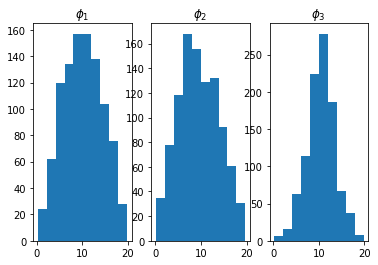

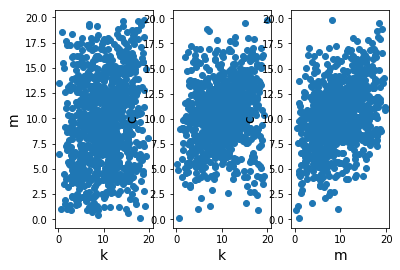

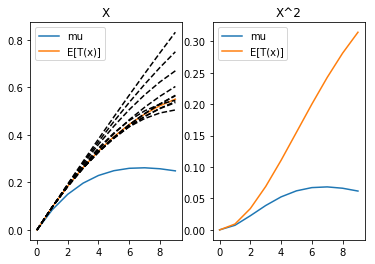

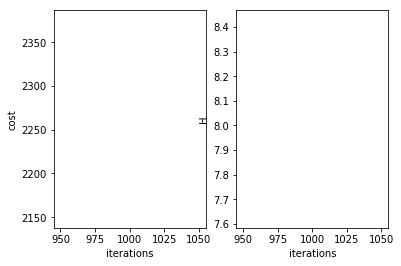

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
Doubling memory allocation for parameter logging.
******************************************
it = 2000 
H 7.971332673715511
cost 2294.2422326841074
system.D 3


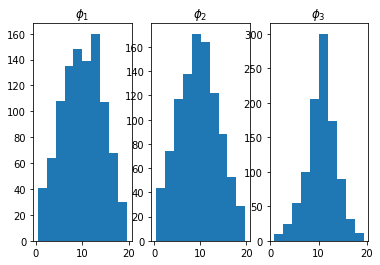

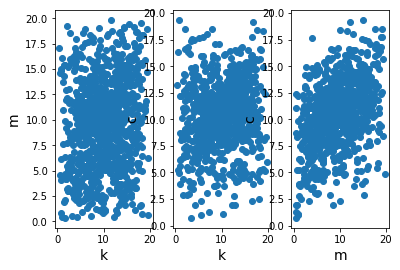

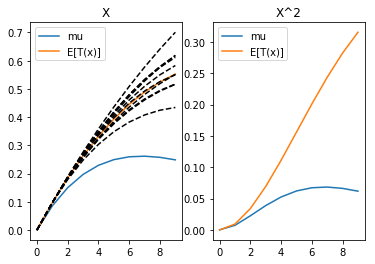

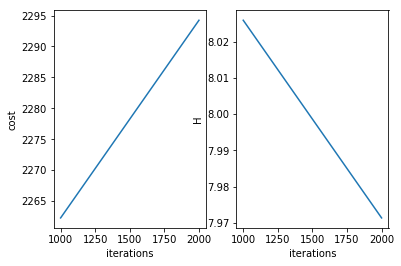

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
Doubling memory allocation for parameter logging.
******************************************
it = 3000 
H 7.9395575444345114
cost 2365.420229251827
system.D 3


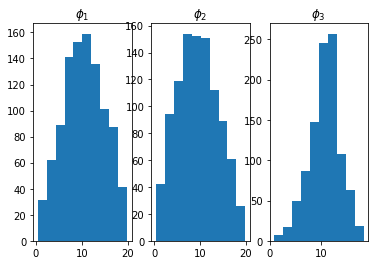

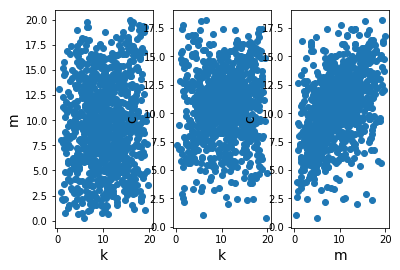

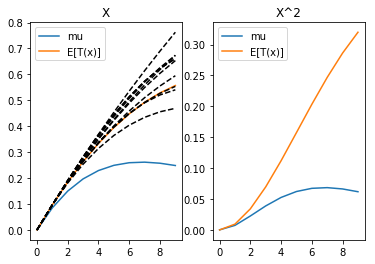

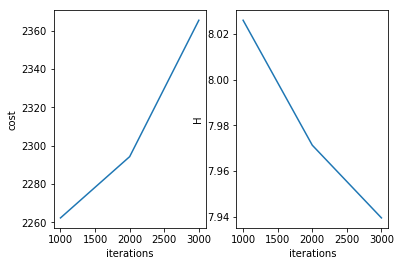

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 4000 
H 7.934876014235567
cost 2424.1148640908445
system.D 3


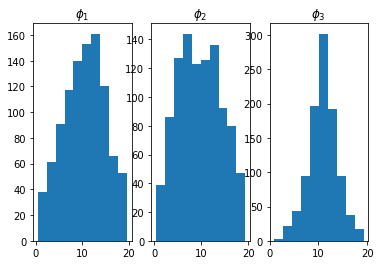

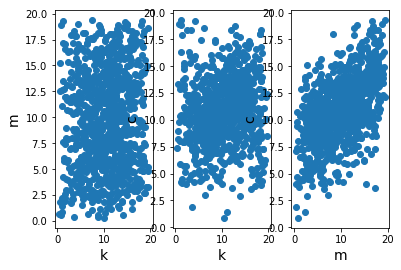

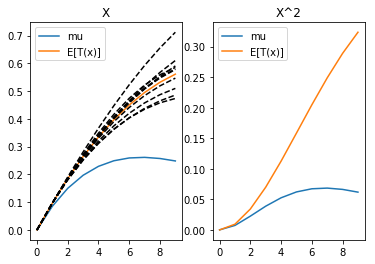

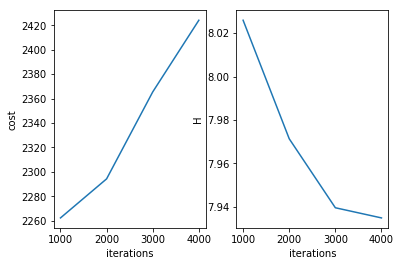

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
Doubling memory allocation for parameter logging.
******************************************
it = 5000 
H 7.992937400832878
cost 2242.0643003585087
system.D 3


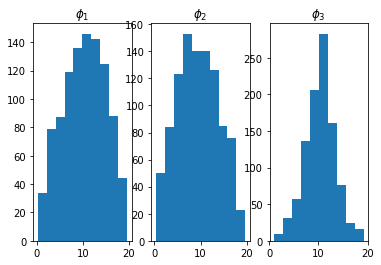

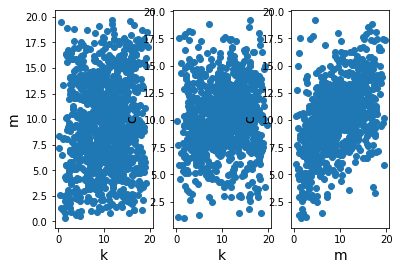

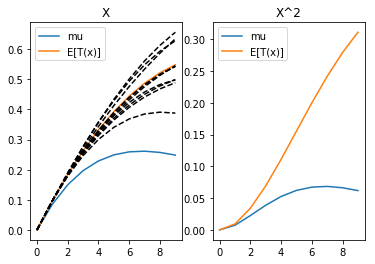

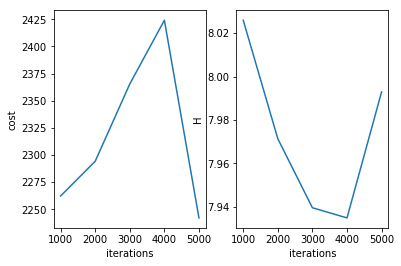

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 6000 
H 7.760627761247522
cost 2447.240911485007
system.D 3


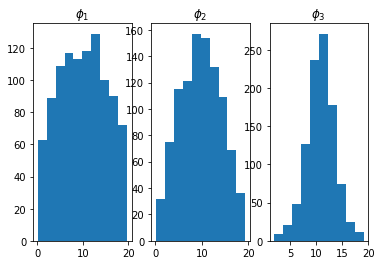

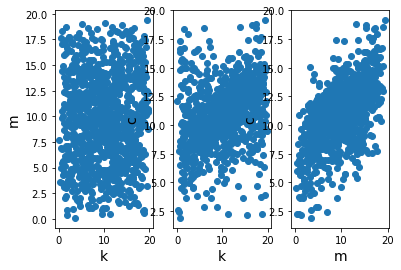

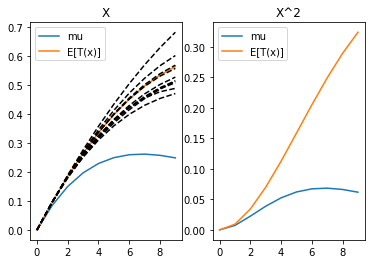

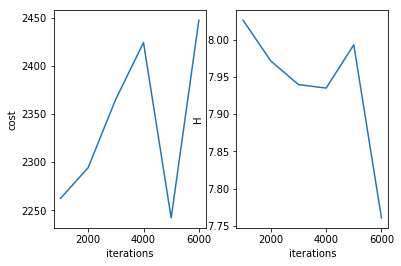

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 7000 
H 7.653731200600643
cost 2405.4480234023736
system.D 3


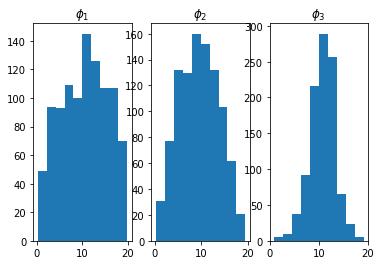

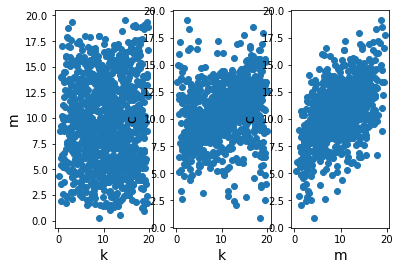

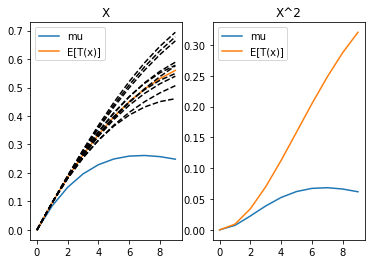

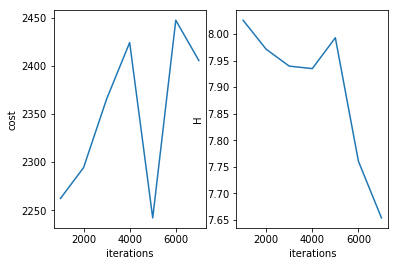

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 8000 
H 7.759705679428986
cost 2415.804419653617
system.D 3


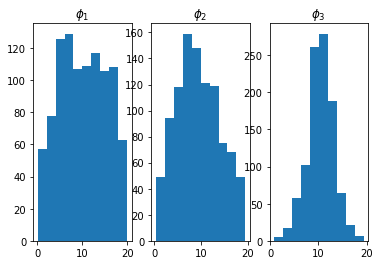

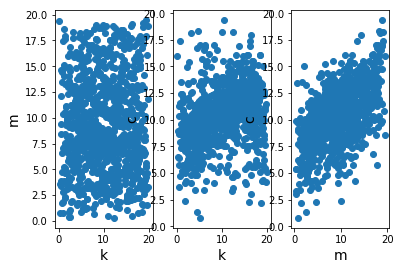

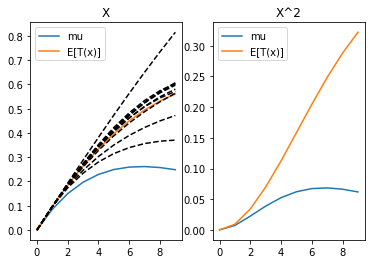

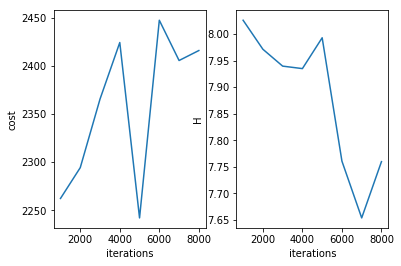

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 9000 
H 7.741844950760854
cost 2324.8413998416886
system.D 3


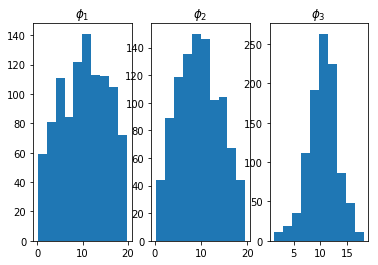

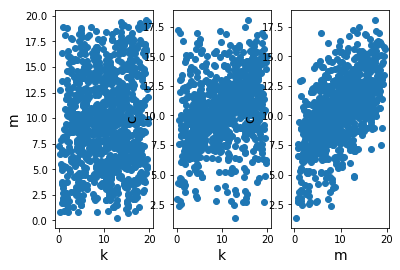

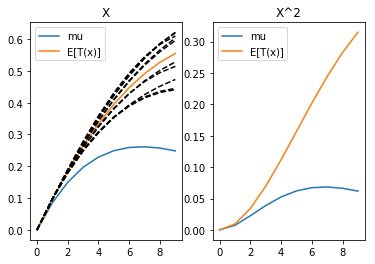

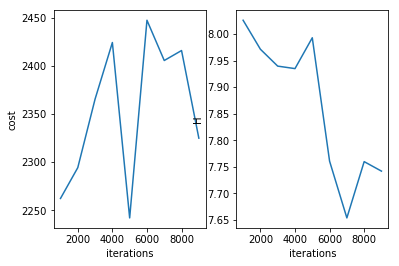

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
Doubling memory allocation for parameter logging.
******************************************
it = 10000 
H 7.732937137196449
cost 2108.1389012739696
system.D 3


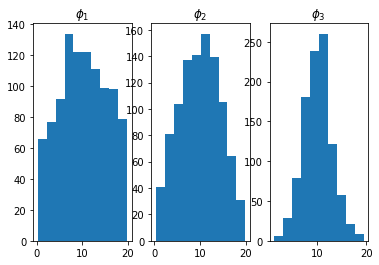

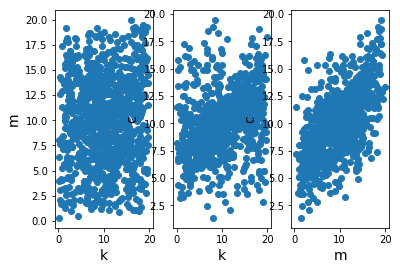

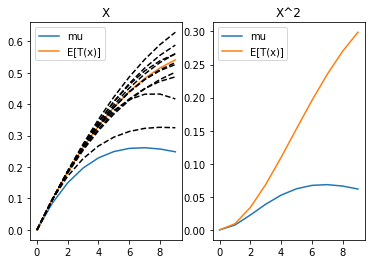

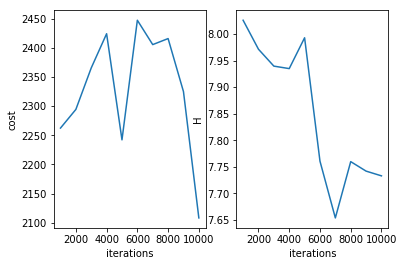

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/
AL iteration 2
resetting optimizer
saving model at iter 0
******************************************
it = 11000 
H 7.855228312296306
cost 17696.868021020997
system.D 3


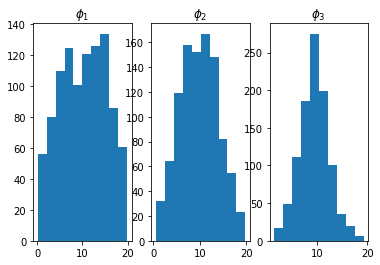

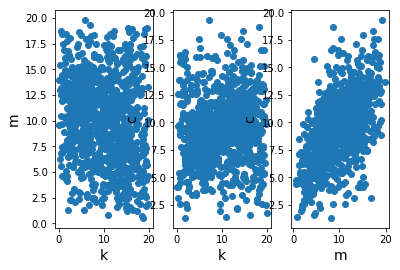

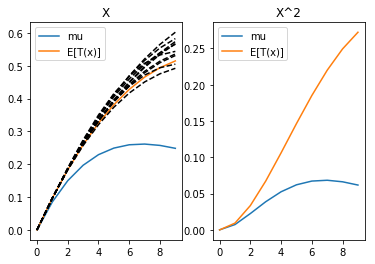

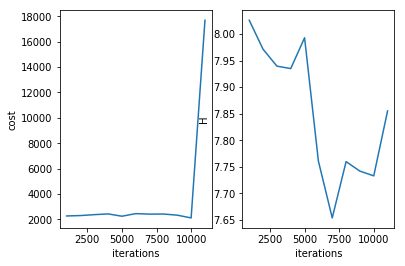

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 12000 
H 7.814116287693394
cost 18052.135655789763
system.D 3


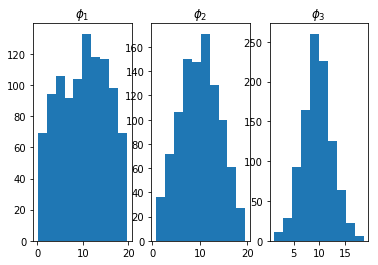

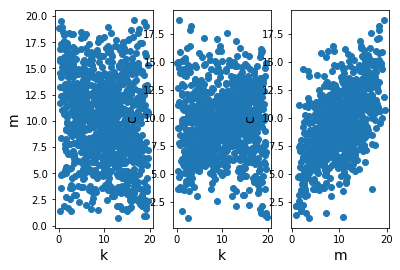

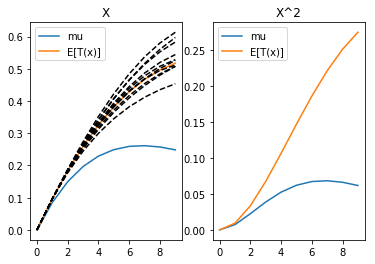

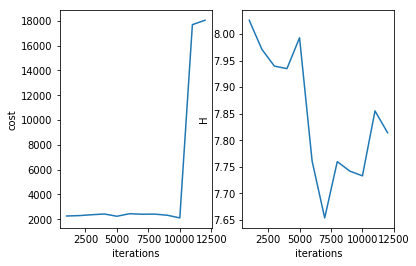

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 13000 
H 7.802172072998834
cost 17544.55607311149
system.D 3


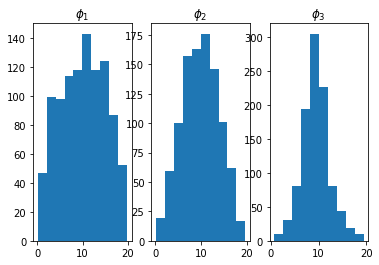

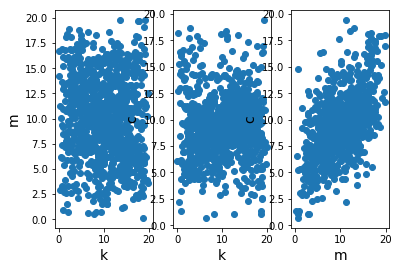

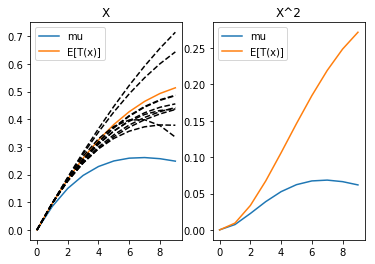

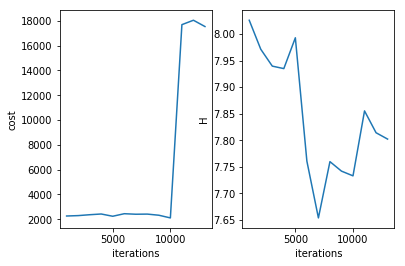

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 14000 
H 7.806693044908333
cost 16571.412924992885
system.D 3


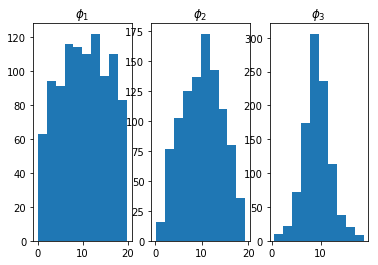

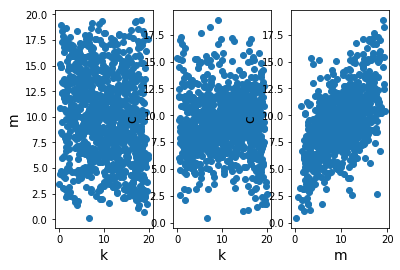

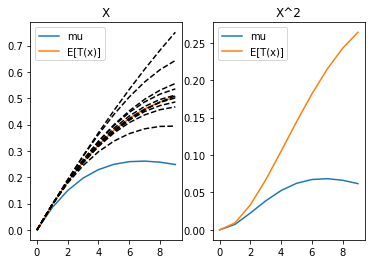

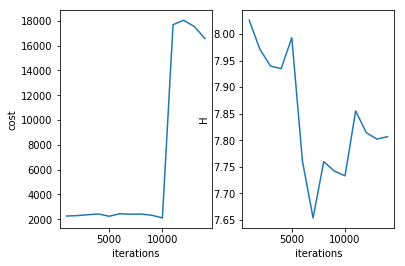

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 15000 
H 7.772287595976585
cost 15300.620483174152
system.D 3


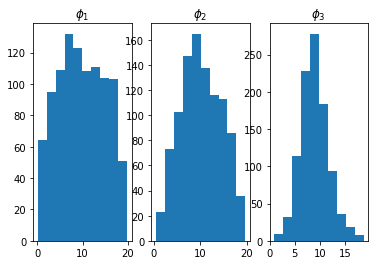

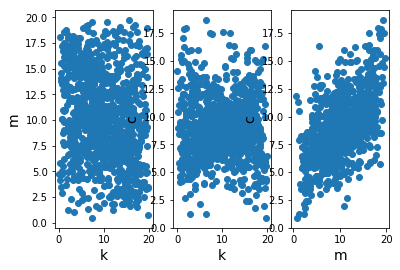

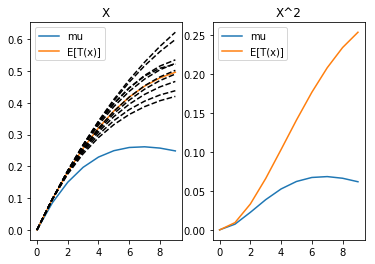

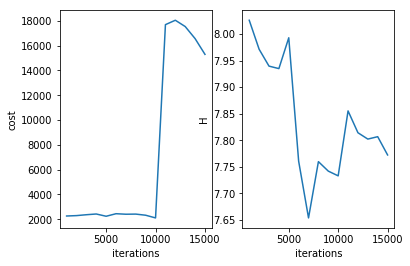

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 16000 
H 7.733700265829528
cost 14213.10748439601
system.D 3


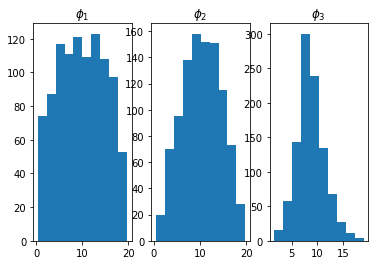

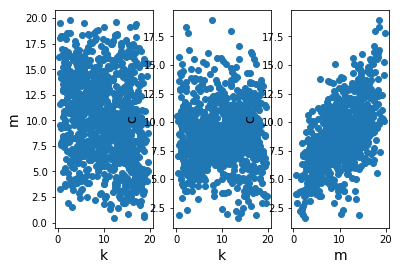

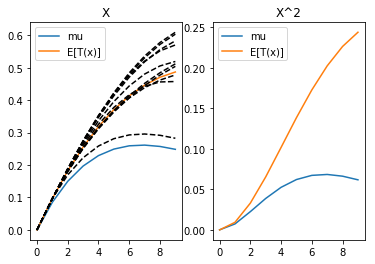

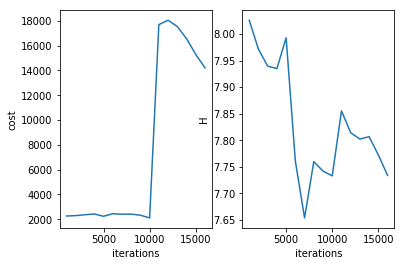

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 17000 
H 7.661232605443919
cost 15367.821945996455
system.D 3


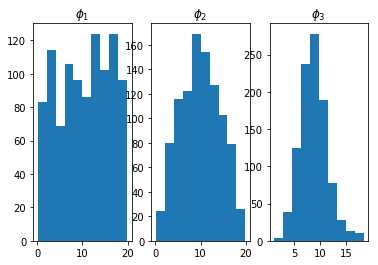

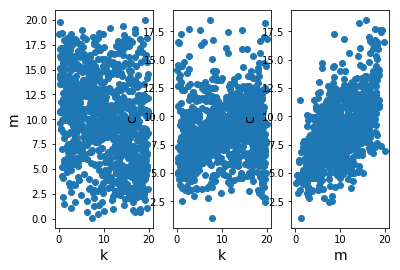

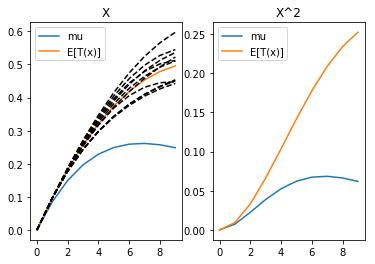

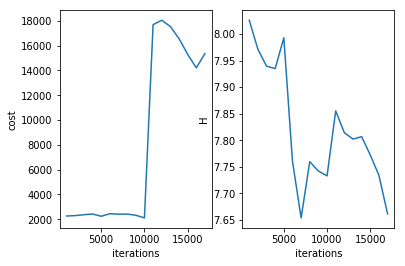

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 18000 
H 7.698377239498756
cost 13372.126202267782
system.D 3


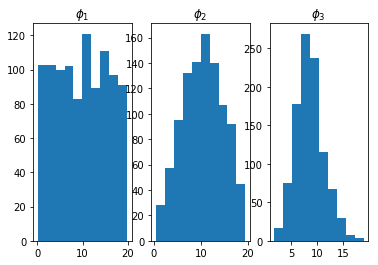

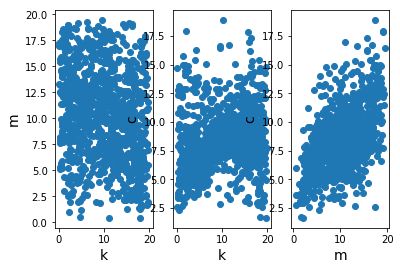

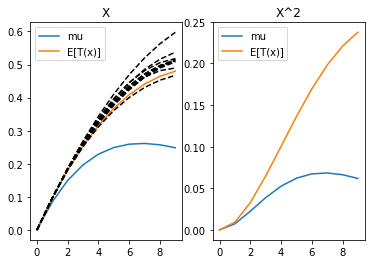

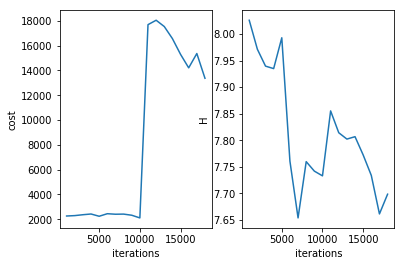

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 19000 
H 7.589328902265632
cost 10740.793524474551
system.D 3


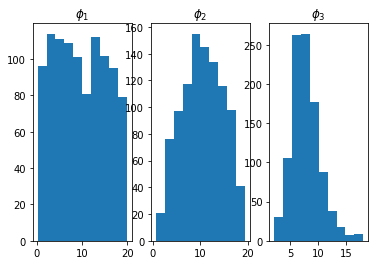

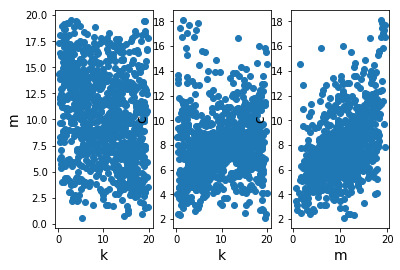

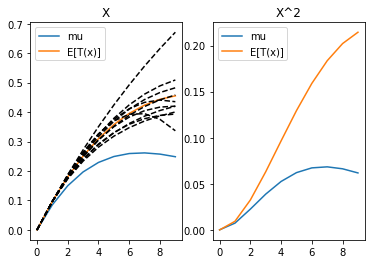

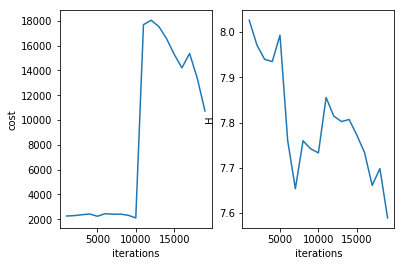

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
Doubling memory allocation for parameter logging.
******************************************
it = 20000 
H 7.715892205183722
cost 6619.892848541699
system.D 3


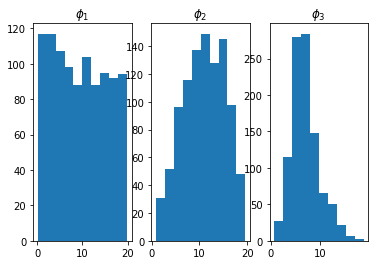

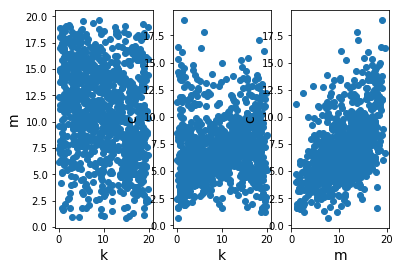

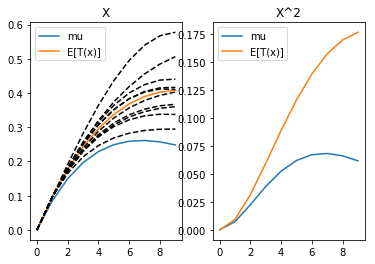

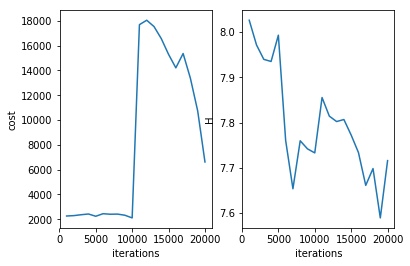

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/
AL iteration 3
resetting optimizer
saving model at iter 0
******************************************
it = 21000 
H 7.56934058934847
cost 40124.674098631804
system.D 3


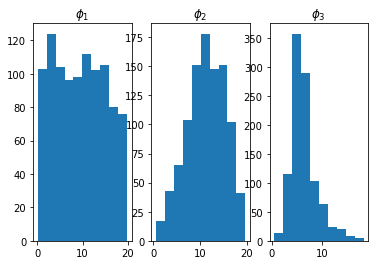

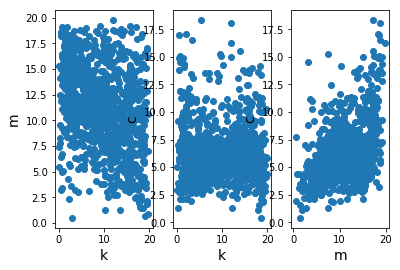

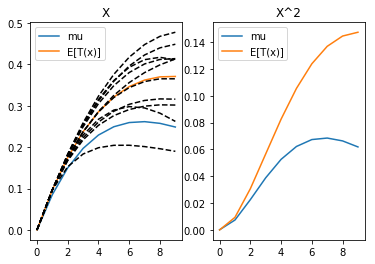

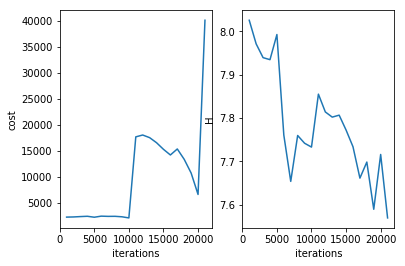

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 22000 
H 7.458468597309063
cost 35157.89107241484
system.D 3


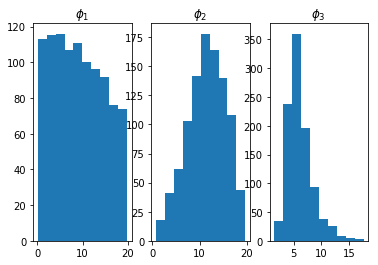

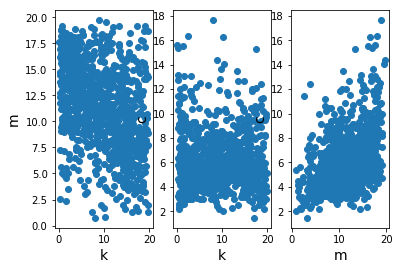

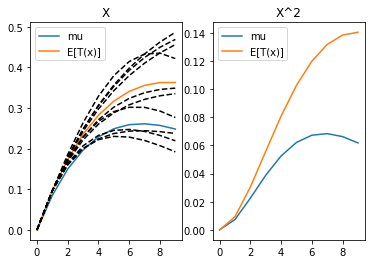

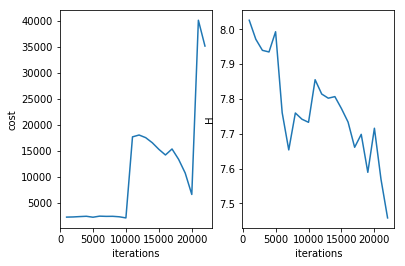

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 23000 
H 7.473173416877234
cost 39026.462451542684
system.D 3


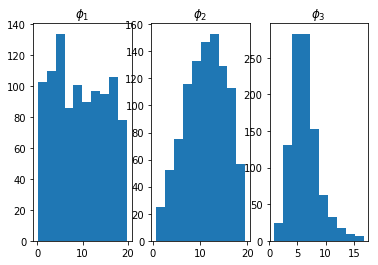

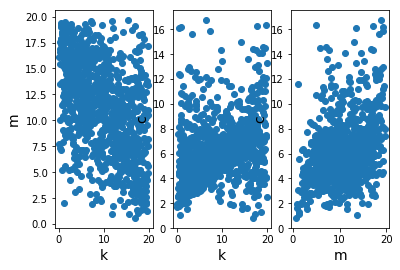

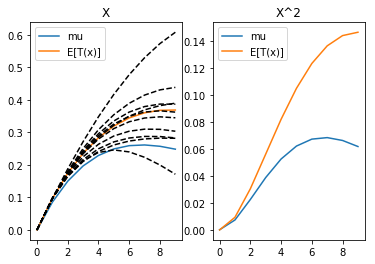

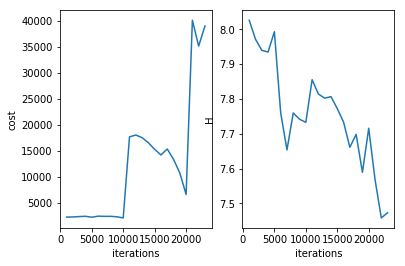

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 24000 
H 7.425930120623325
cost 40687.753194235505
system.D 3


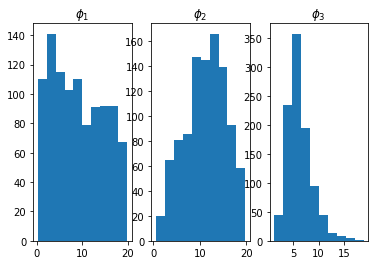

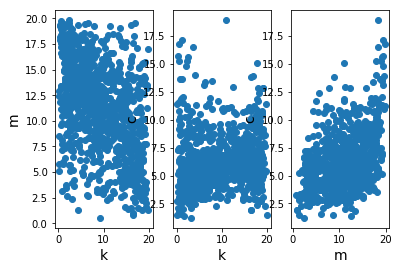

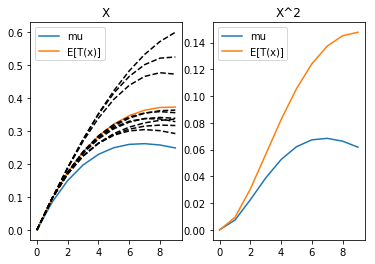

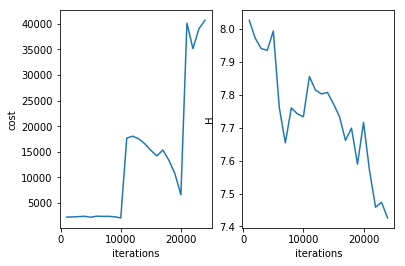

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 25000 
H 7.327206833130141
cost 38777.011775198276
system.D 3


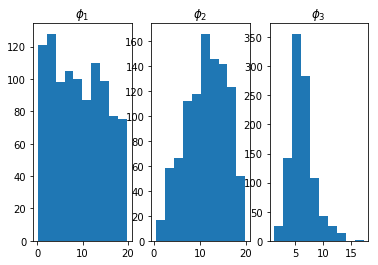

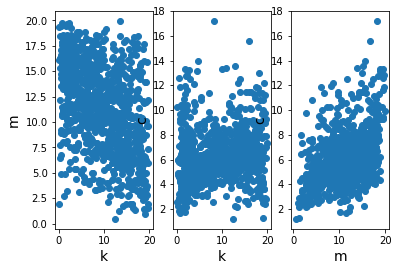

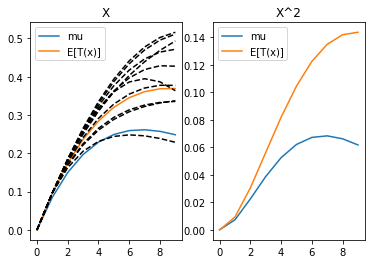

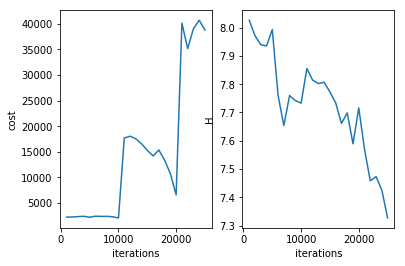

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 26000 
H 7.317876244311448
cost 30459.303883526336
system.D 3


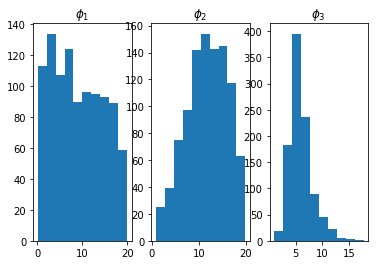

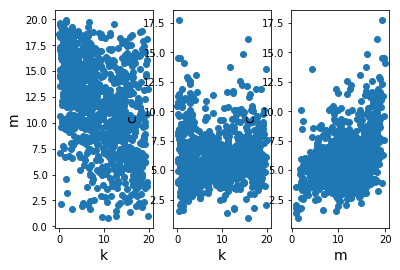

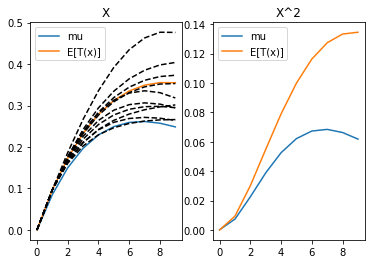

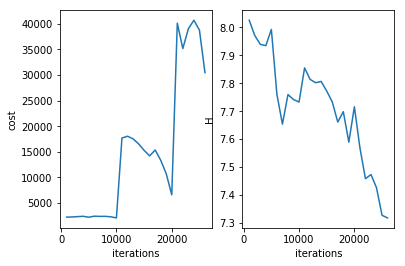

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 27000 
H 7.246213034878532
cost 19898.792468286854
system.D 3


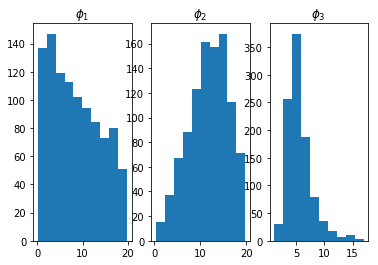

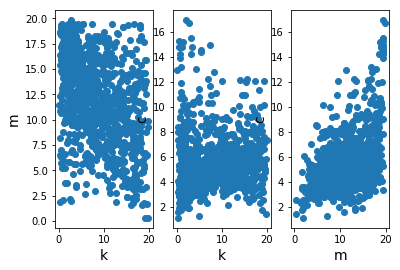

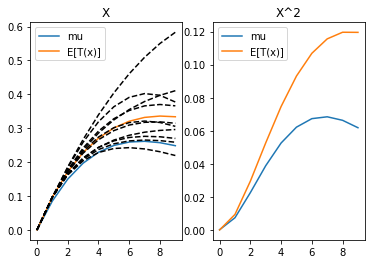

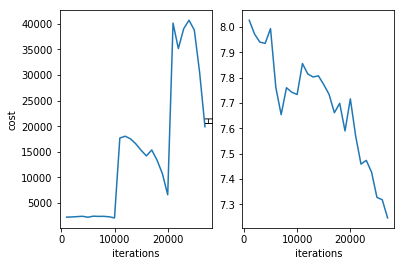

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 28000 
H 7.115193063963203
cost 8826.007925757562
system.D 3


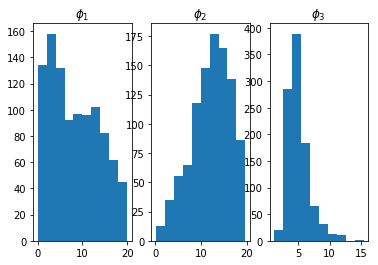

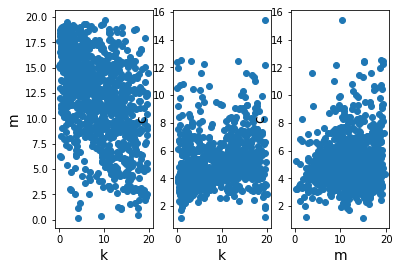

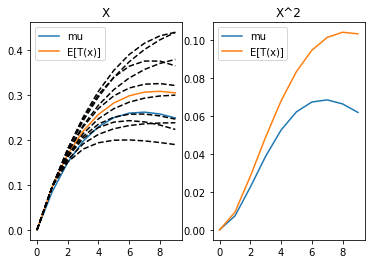

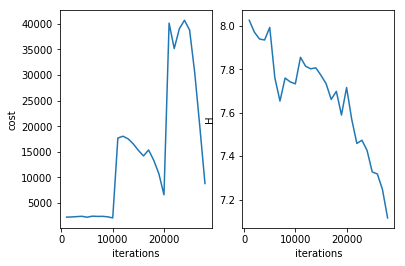

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 29000 
H 7.065527539946378
cost 6763.206096198244
system.D 3


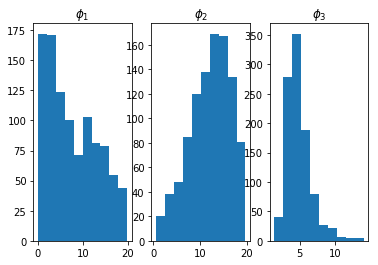

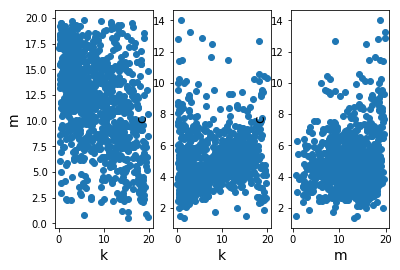

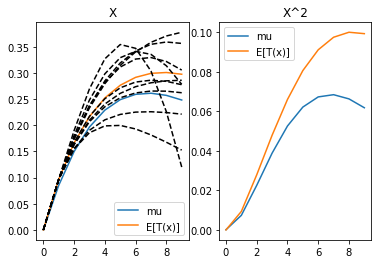

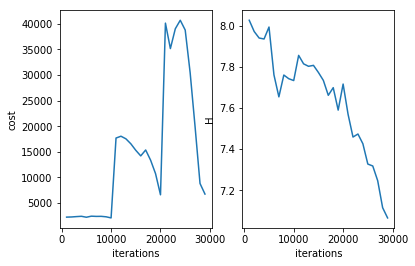

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 30000 
H 7.0949088453148015
cost 6441.5072581948525
system.D 3


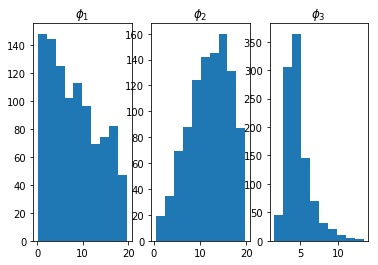

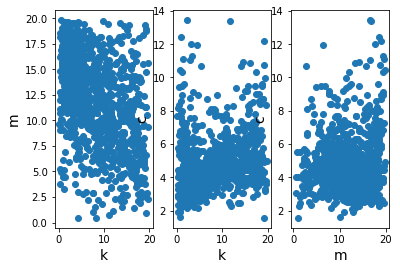

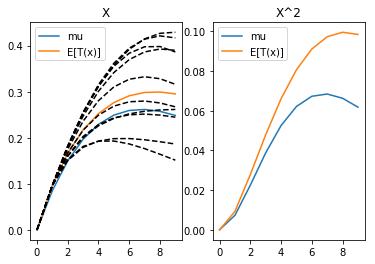

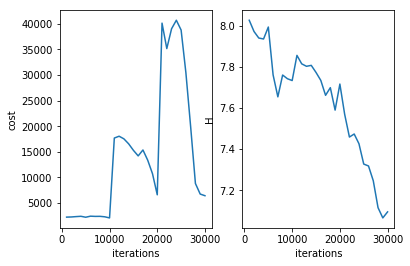

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/
AL iteration 4
resetting optimizer
saving model at iter 0
******************************************
it = 31000 
H 6.735596407746383
cost 3080.4930315027705
system.D 3


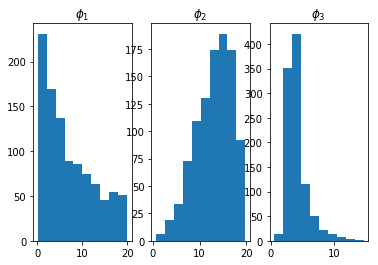

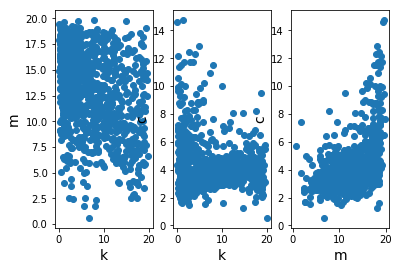

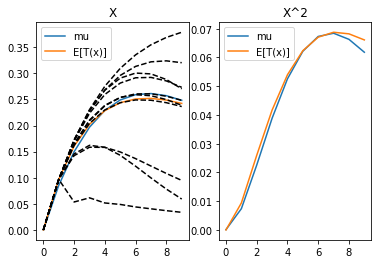

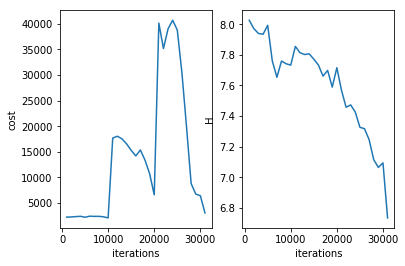

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 32000 
H 6.636148455400345
cost 2758.638807819116
system.D 3


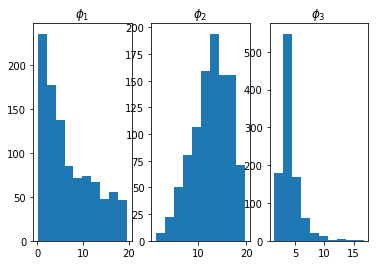

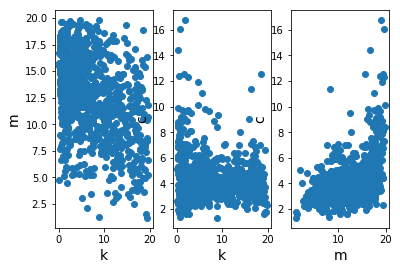

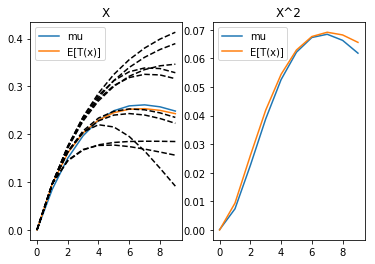

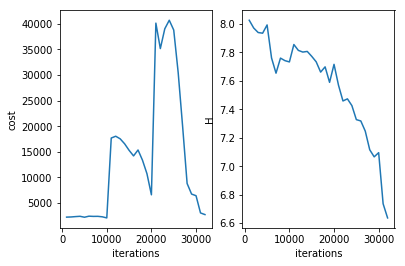

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 33000 
H 6.5945713921503675
cost 2446.4174724427585
system.D 3


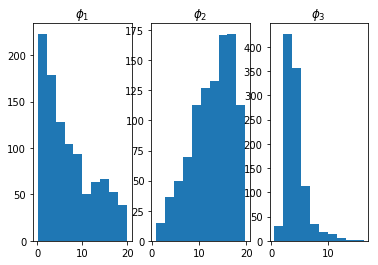

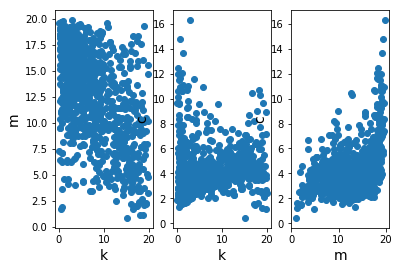

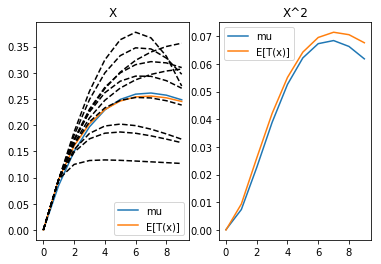

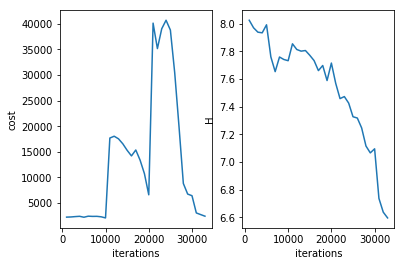

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 34000 
H 6.5409494790352305
cost 2509.6662828430053
system.D 3


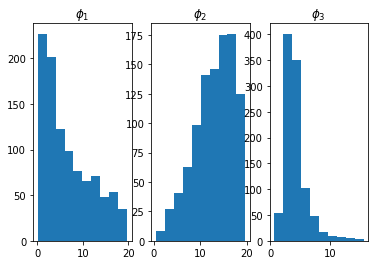

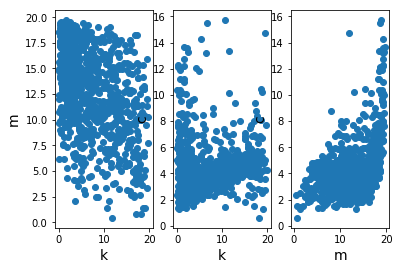

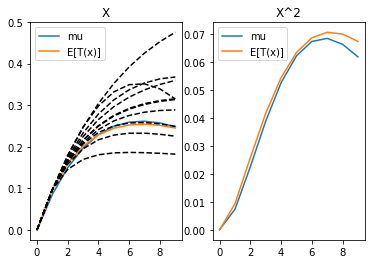

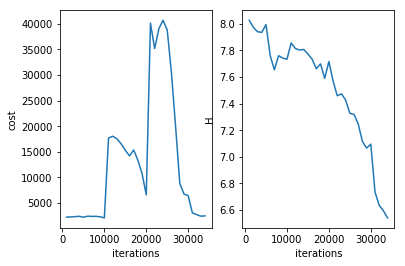

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 35000 
H 6.6317942945399135
cost 2290.827399732483
system.D 3


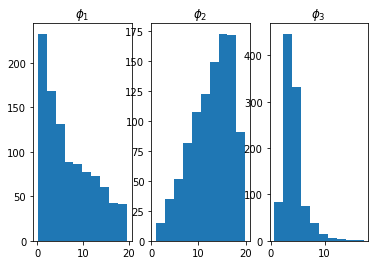

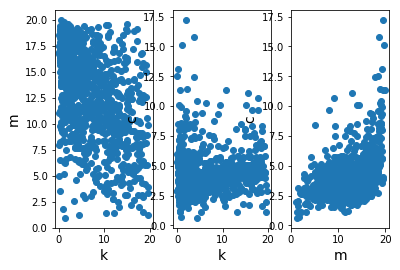

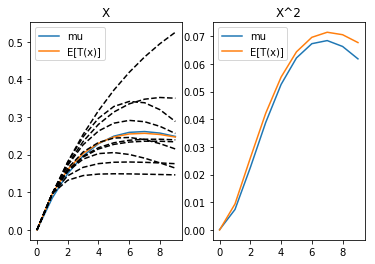

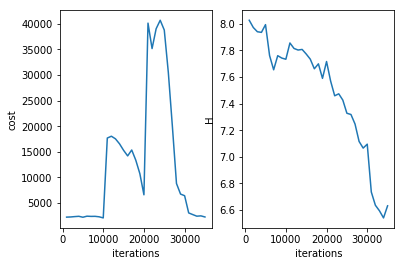

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 36000 
H 6.532717733959973
cost 24757.440750077247
system.D 3


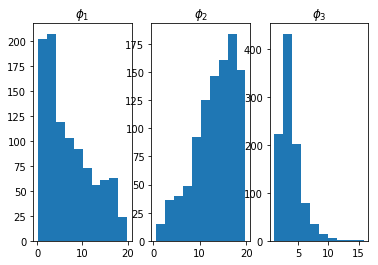

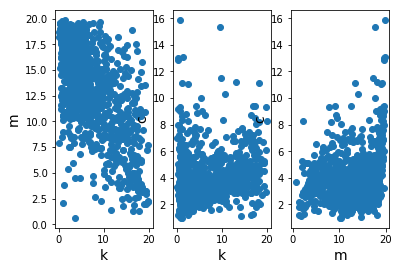

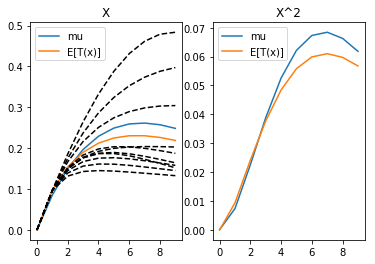

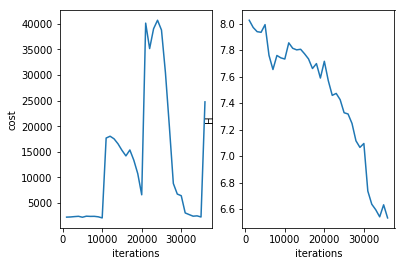

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 37000 
H 6.519486030726714
cost 30586.079417973346
system.D 3


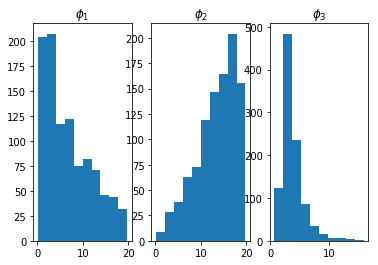

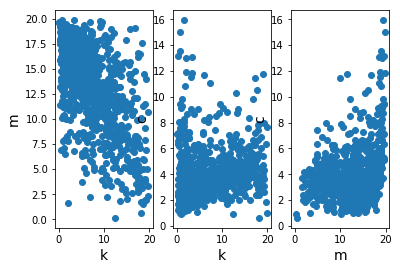

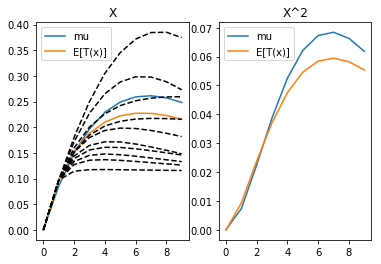

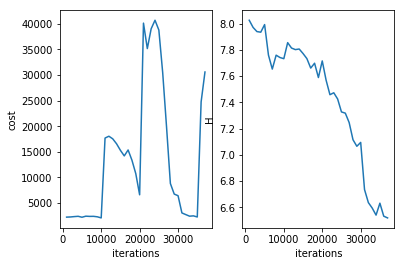

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 38000 
H 6.585445957360669
cost 24148.56464102799
system.D 3


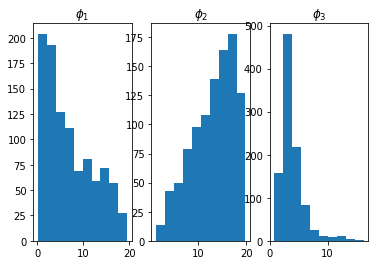

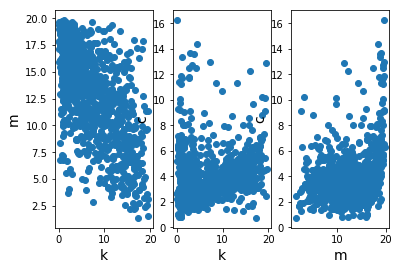

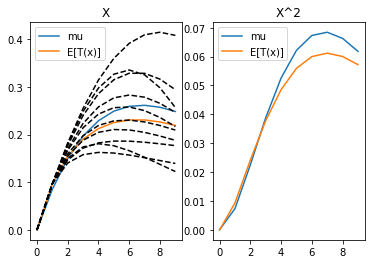

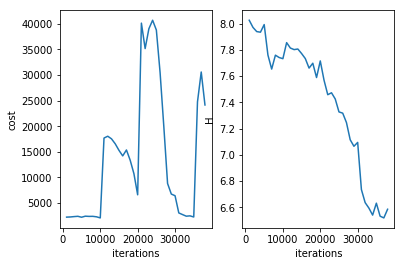

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 39000 
H 6.466819549308529
cost 33821.762715605226
system.D 3


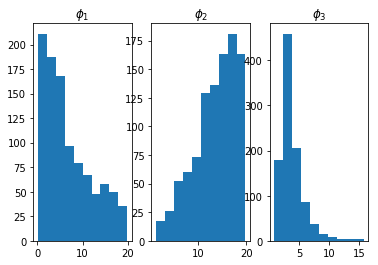

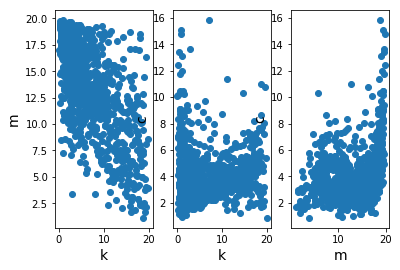

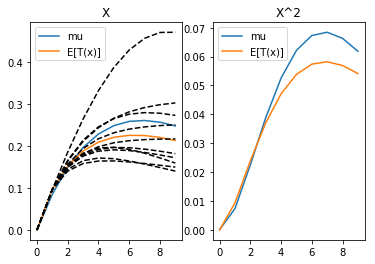

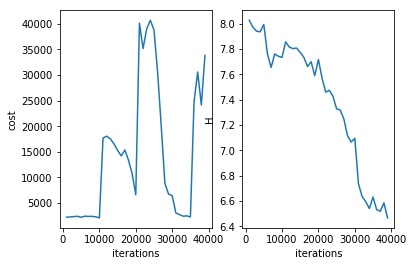

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
Doubling memory allocation for parameter logging.
******************************************
it = 40000 
H 6.549178920660717
cost 26816.34766024434
system.D 3


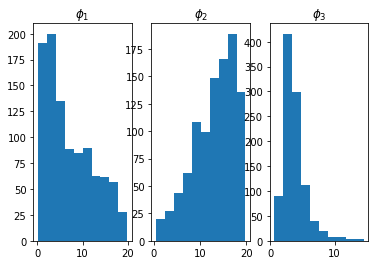

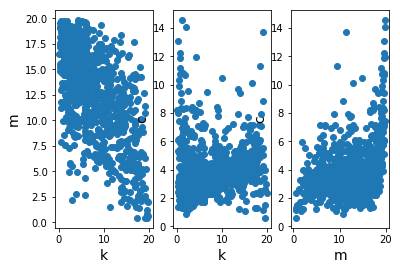

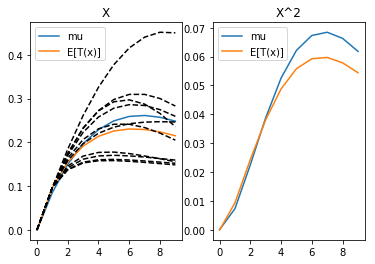

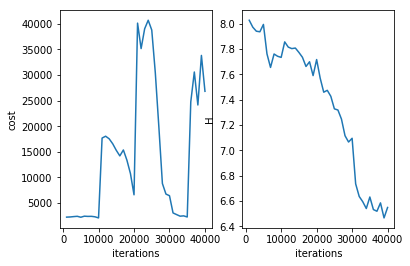

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/
AL iteration 5
resetting optimizer
saving model at iter 0
******************************************
it = 41000 
H 6.484272523243286
cost 1283344.5192972887
system.D 3


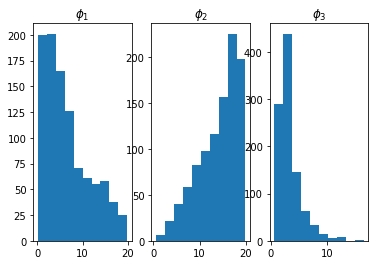

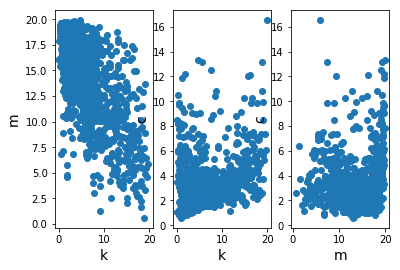

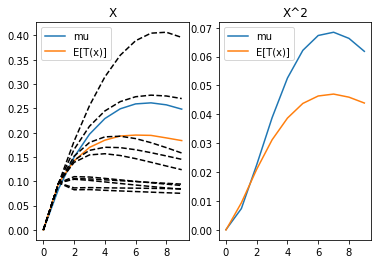

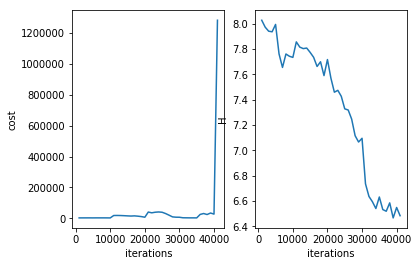

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 42000 
H 6.462659962958288
cost 1446546.23481625
system.D 3


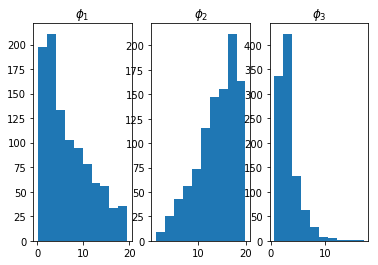

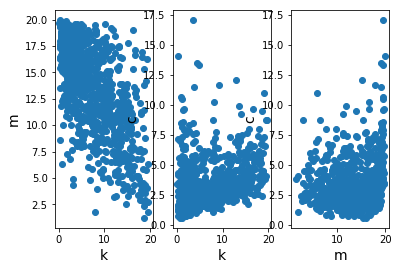

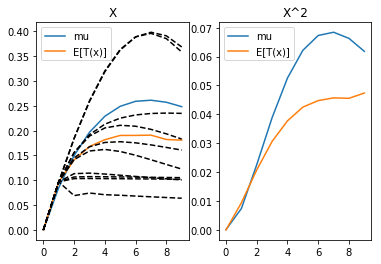

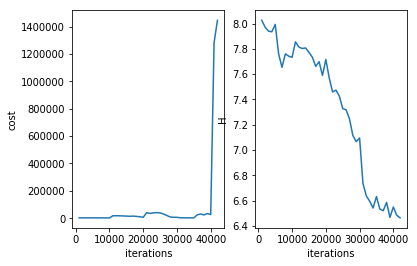

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 43000 
H 6.45612483215064
cost 61906905.453131385
system.D 3


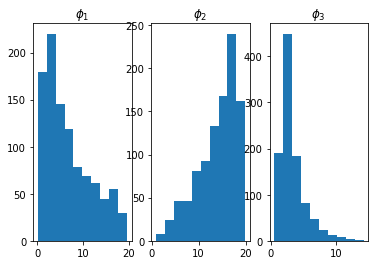

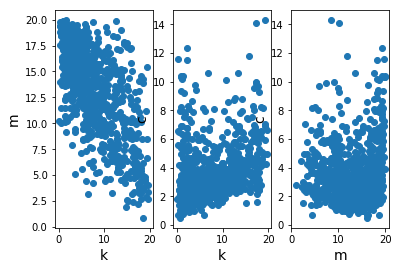

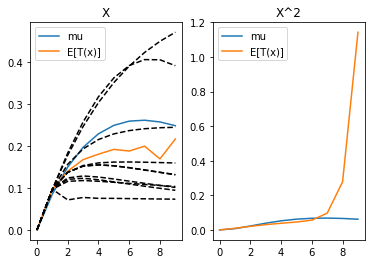

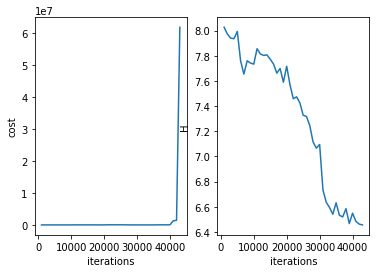

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 44000 
H 6.396390818984361
cost 1469442.9770385595
system.D 3


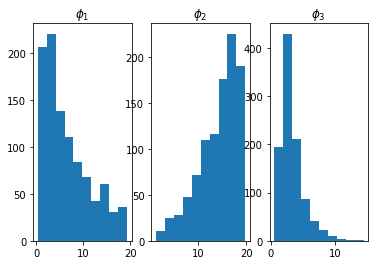

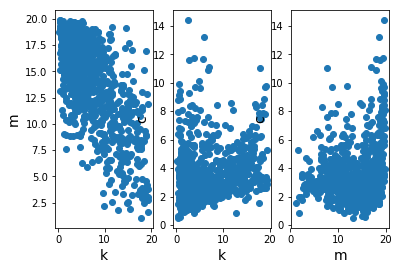

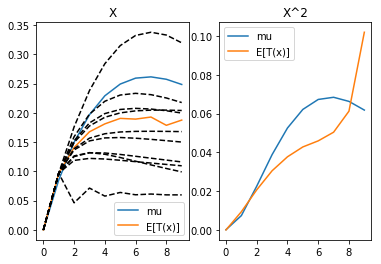

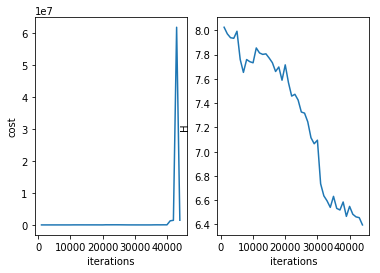

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 45000 
H 6.535425614667593
cost 150825057948164.34
system.D 3


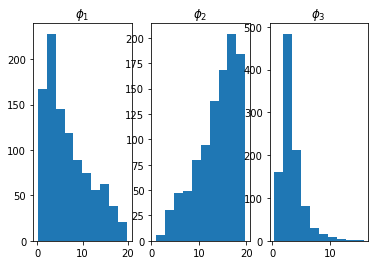

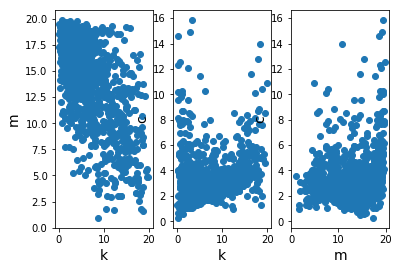

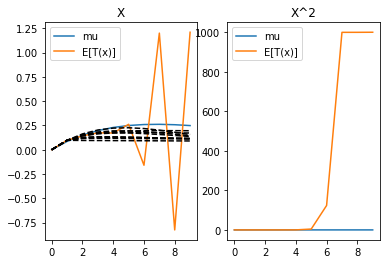

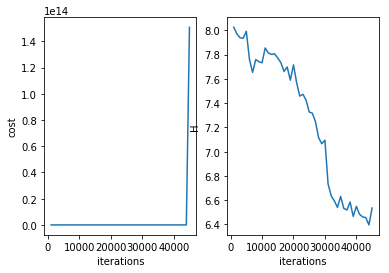

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 46000 
H 6.503817186097354
cost 234601063.04946798
system.D 3


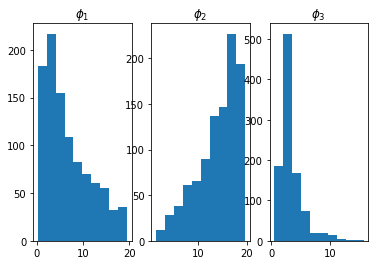

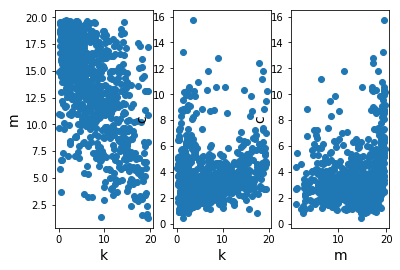

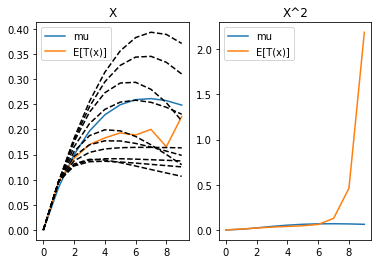

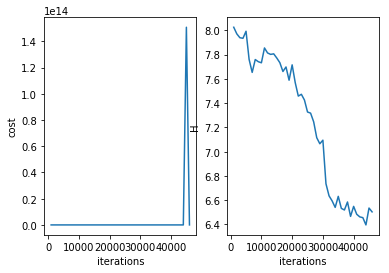

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 47000 
H 6.449307104153416
cost 10302318092.853357
system.D 3


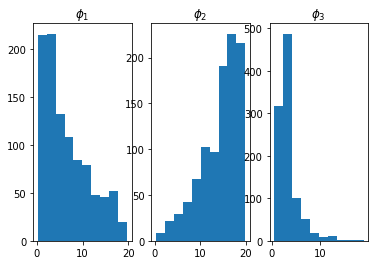

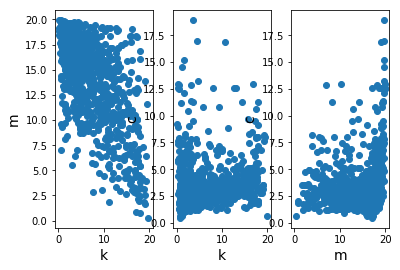

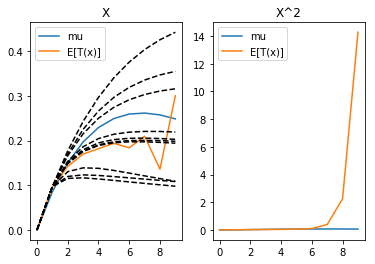

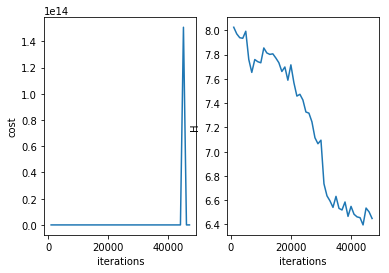

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************
******************************************
it = 48000 
H 6.526158483456329
cost 1623555.4428096246
system.D 3


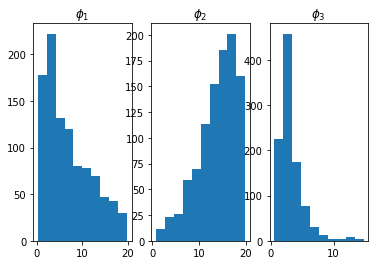

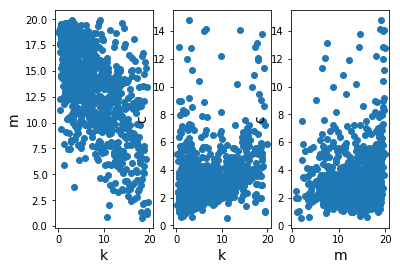

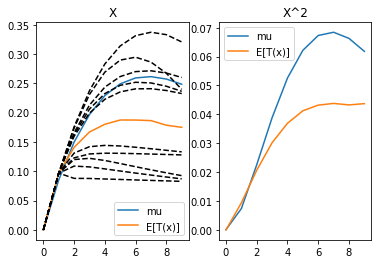

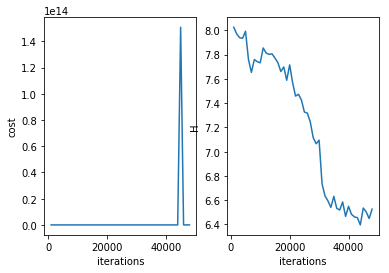

saving to results//tb/damped_harmonic_oscillator_D=3_T=10_flow=10P_rs=1/  ...
******************************************


KeyboardInterrupt: 

In [17]:
behavior_str = 'trajectory';
random_seed = 1;

TIF_flow_type = 'PlanarFlowLayer';
nlayers = 10;
flow_dict = {'latent_dynamics':None, \
             'TIF_flow_type':TIF_flow_type, \
             'repeats':nlayers};

n = 1000;
k_max = 10;
c_init = 1e4;
check_rate = 1000;
max_iters = 10000;
lr_order = -3;


system_class = system_from_str(system_str);
system = system_class(behavior_str, T, dt, init_conds, bounds);

np.random.seed(0);

behavior = {'mu':mu, 'Sigma':Sigma};
print(behavior)
print(init_conds)

cost, phi, T_x = train_dsn(system, behavior, n, flow_dict, \
                       k_max=k_max, c_init=c_init, lr_order=lr_order, check_rate=check_rate, \
                       max_iters=max_iters, random_seed=random_seed);

